In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

In [2]:
import yfinance as yf
data = yf.download(tickers="BTC-USD" , start = "2018-01-01" ,end="2022-01-31" )
data = data.resample('6h').ffill()

# Display the fetched data
print(data)

data.to_csv('data.csv')


[*********************100%%**********************]  1 of 1 completed
                             Open          High           Low         Close  \
Date                                                                          
2018-01-01 00:00:00  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-01 06:00:00  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-01 12:00:00  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-01 18:00:00  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02 00:00:00  13625.000000  15444.599609  13163.599609  14982.099609   
...                           ...           ...           ...           ...   
2022-01-29 00:00:00  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-29 06:00:00  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-29 12:00:00  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-29 18:00:00  37780.714844  38576.261719  37406.472656 

In [3]:
data_dir = 'data.csv'
df = pd.read_csv(data_dir)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01 00:00:00,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-01 06:00:00,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2,2018-01-01 12:00:00,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
3,2018-01-01 18:00:00,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
4,2018-01-02 00:00:00,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5956,2022-01-29 00:00:00,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
5957,2022-01-29 06:00:00,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
5958,2022-01-29 12:00:00,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
5959,2022-01-29 18:00:00,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
5960,2022-01-30 00:00:00,38151.917969,38266.339844,37437.710938,37917.601562,37917.601562,14643548444


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5961 non-null   object 
 1   Open       5961 non-null   float64
 2   High       5961 non-null   float64
 3   Low        5961 non-null   float64
 4   Close      5961 non-null   float64
 5   Adj Close  5961 non-null   float64
 6   Volume     5961 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 326.1+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5.961000e+03
mean,18811.883204,19305.647161,18255.341808,18824.931619,18824.931619,2.584160e+10
std,17871.322918,18357.975282,17303.405024,17872.151776,17872.151776,2.104103e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,7179.283203,7319.856934,6936.706543,7176.414551,7176.414551,8.438110e+09
50%,9539.485352,9711.889648,9349.545898,9538.024414,9538.024414,2.248291e+10
75%,32564.029297,33858.312500,31223.990234,32702.025391,32702.025391,3.621693e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

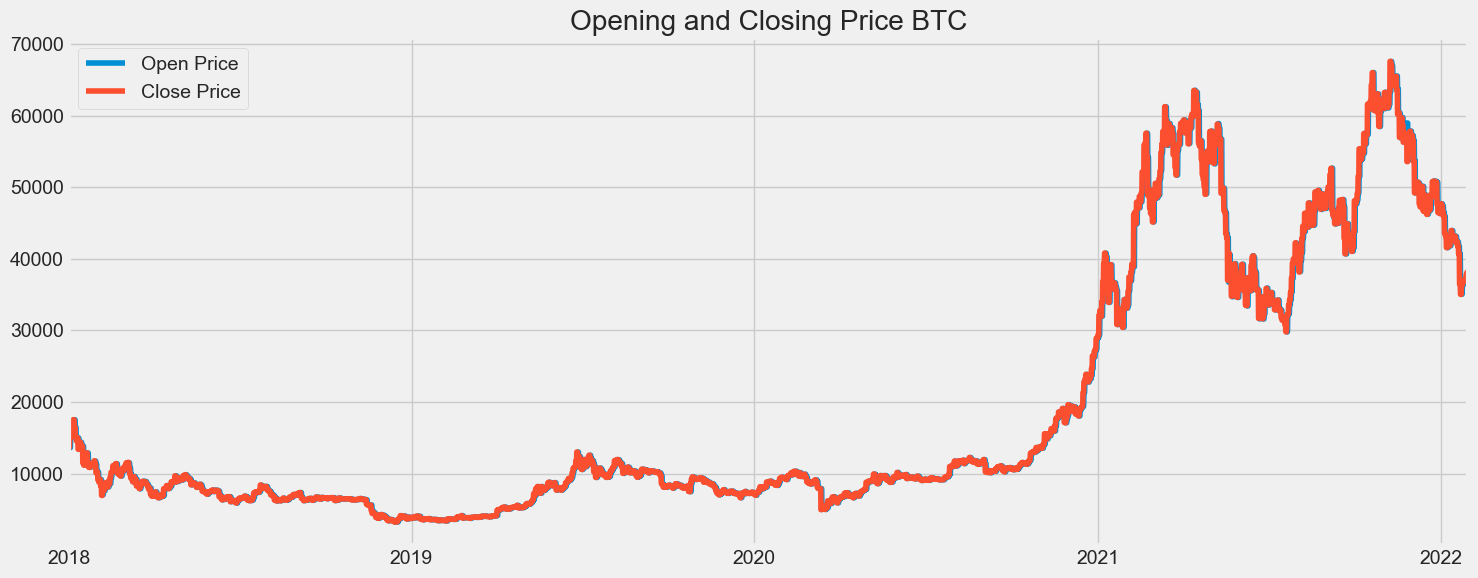

In [9]:
plt.figure(figsize=(15, 6))
df[r'Open'].plot()
df[r'Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening and Closing Price BTC')
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

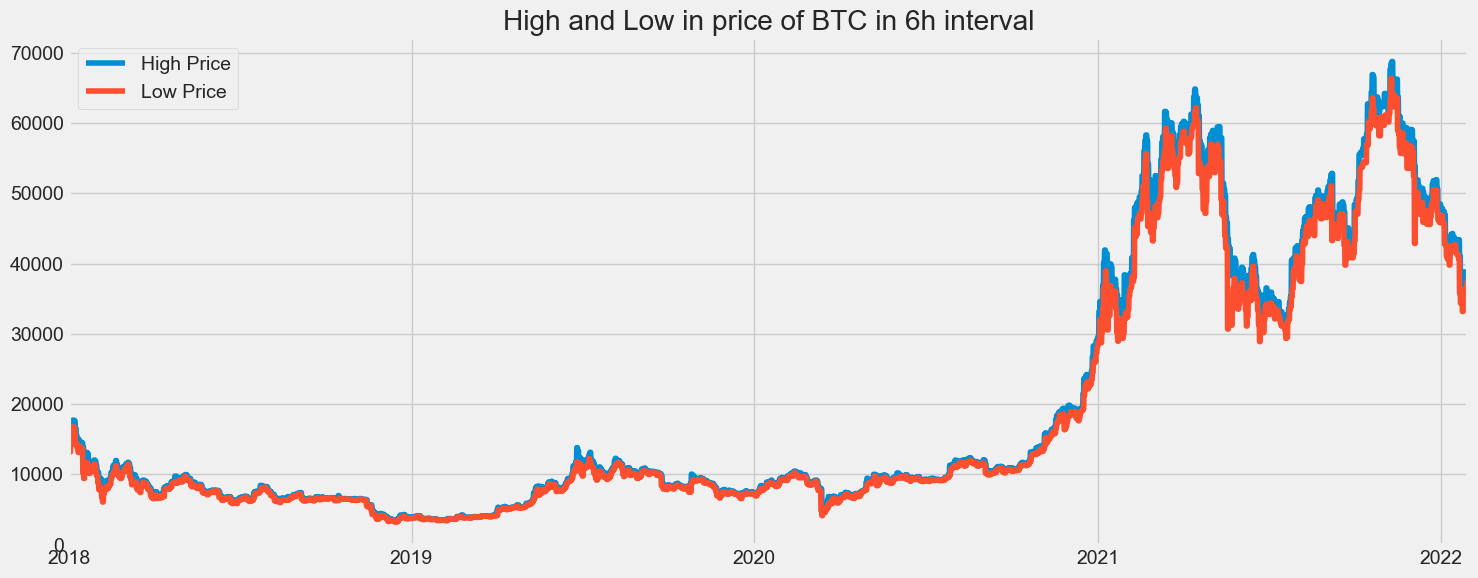

In [10]:
plt.figure(figsize=(15, 6))
df[r'High'].plot()
df[r'Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('High and Low in price of BTC in 6h interval')
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

In [11]:
n_cols = 1
dataset = df[r'Close']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(5961, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data))

In [13]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print('Train Size: ', train_size, 'Test size: ', test_size)

Train Size:  4470 Test size:  1491


In [14]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(4470, 1)

In [15]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i <= time_steps:
        print('X_train: ', x_train)
        print('Y_train: ', y_train)

X_train:  [array([[0.16198395],
       [0.16198395],
       [0.16198395],
       [0.16198395],
       [0.18257929],
       [0.18257929],
       [0.18257929],
       [0.18257929],
       [0.18598206],
       [0.18598206],
       [0.18598206],
       [0.18598206],
       [0.19217201],
       [0.19217201],
       [0.19217201],
       [0.19217201],
       [0.22062372],
       [0.22062372],
       [0.22062372],
       [0.22062372],
       [0.22213934],
       [0.22213934],
       [0.22213934],
       [0.22213934],
       [0.20582659],
       [0.20582659],
       [0.20582659],
       [0.20582659],
       [0.18550172],
       [0.18550172],
       [0.18550172],
       [0.18550172],
       [0.17656812],
       [0.17656812],
       [0.17656812],
       [0.17656812],
       [0.1824425 ],
       [0.1824425 ],
       [0.1824425 ],
       [0.1824425 ],
       [0.15807598],
       [0.15807598],
       [0.15807598],
       [0.15807598],
       [0.16701114],
       [0.16701114],
       [0.16701114],
  

In [16]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [18]:
x_train.shape, y_train.shape

((4410, 60, 1), (4410, 1))

In [19]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(64, return_sequences=False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer='adam', loss='mse', metrics='mean_absolute_error')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
138/138 [==============================] - 8s 31ms/step - loss: 5.1384e-04 - mean_absolute_error: 0.0111
Epoch 2/100
138/138 [==============================] - 4s 30ms/step - loss: 8.7792e-05 - mean_absolute_error: 0.0060
Epoch 3/100
138/138 [==============================] - 4s 28ms/step - loss: 7.8664e-05 - mean_absolute_error: 0.0056
Epoch 4/100
138/138 [==============================] - 4s 27ms/step - loss: 6.2500e-05 - mean_absolute_error: 0.0047
Epoch 5/100
138/138 [==============================] - 4s 29ms/step - loss: 6.6535e-05 - mean_absolute_error: 0.0052
Epoch 6/100
138/138 [==============================] - 4s 32ms/step - loss: 5.7255e-05 - mean_absolute_error: 0.0048
Epoch 7/100
138/138 [==============================] - 4s 31ms/step - loss: 4.6724e-05 - mean_absolute_error: 0.0041
Epoch 8/100
138/138 [==============================] - 4s 28ms/step - loss: 4.7104e-05 - mean_absolute_error: 0.0043
Epoch 9/100
138/138 [==============================] - 4s 31ms/s

138/138 [==============================] - 4s 27ms/step - loss: 2.4108e-05 - mean_absolute_error: 0.0031
Epoch 71/100
138/138 [==============================] - 4s 27ms/step - loss: 1.7842e-05 - mean_absolute_error: 0.0023
Epoch 72/100
138/138 [==============================] - 4s 27ms/step - loss: 1.6932e-05 - mean_absolute_error: 0.0020
Epoch 73/100
138/138 [==============================] - 4s 27ms/step - loss: 2.2860e-05 - mean_absolute_error: 0.0027
Epoch 74/100
138/138 [==============================] - 4s 27ms/step - loss: 1.8193e-05 - mean_absolute_error: 0.0023
Epoch 75/100
138/138 [==============================] - 4s 28ms/step - loss: 1.9329e-05 - mean_absolute_error: 0.0024
Epoch 76/100
138/138 [==============================] - 4s 27ms/step - loss: 2.0643e-05 - mean_absolute_error: 0.0027
Epoch 77/100
138/138 [==============================] - 4s 28ms/step - loss: 1.6958e-05 - mean_absolute_error: 0.0022
Epoch 78/100
138/138 [==============================] - 4s 28ms/step 

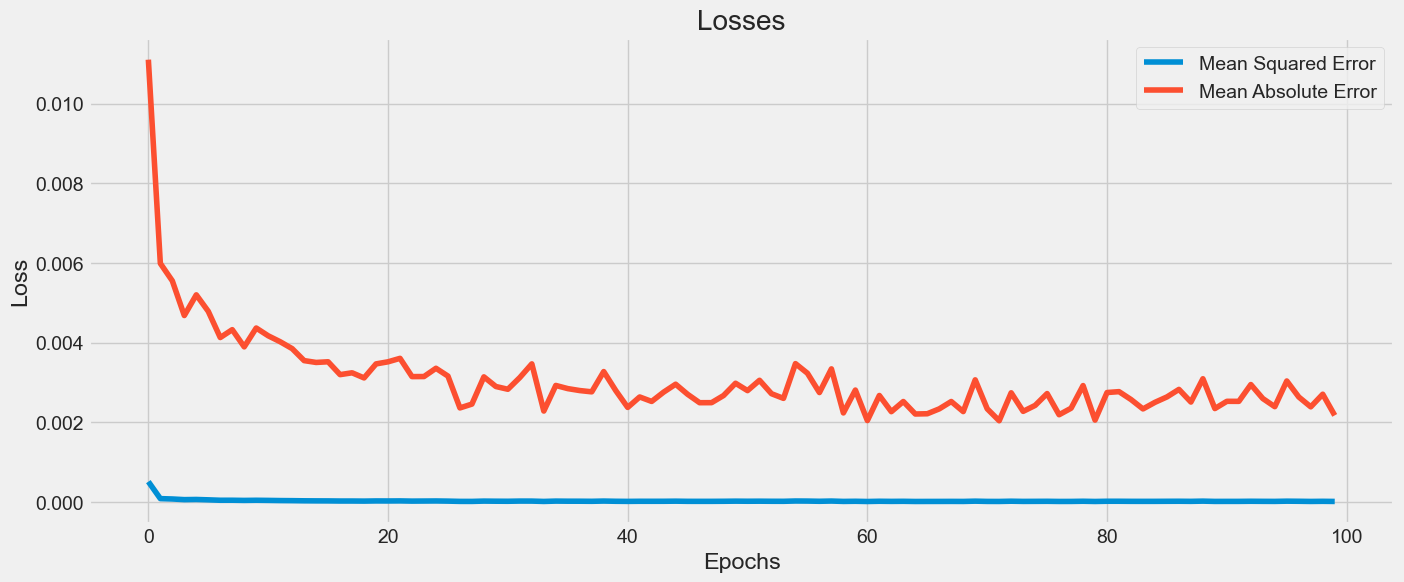

In [22]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Mean Squared Error', 'Mean Absolute Error'])
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [23]:
time_steps = 60
test_data = scaled_data[train_size-time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [24]:
x_test.shape , y_test.shape

((1491, 60, 1), (1491, 1))

In [25]:
predictions = model.predict(x_test)

47/47 [==============================] - 1s 12ms/step


In [26]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(1491, 1)

In [27]:
y_test = scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean(y_test-predictions)**2).round(2)
rmse

352.55

In [28]:
preds_acts = pd.DataFrame(data={'Predictions': predictions.flatten(), 'Actuals': y_test.flatten()})
preds_acts

,Predictions,Actuals
0,33594.480469,33005.761719
1,33717.445312,33005.761719
2,33761.343750,32067.642578
3,32805.289062,32067.642578
4,32813.238281,32067.642578
...,...,...
1486,38474.421875,38138.179688
1487,38832.023438,38138.179688
1488,38811.433594,38138.179688
1489,38816.253906,38138.179688


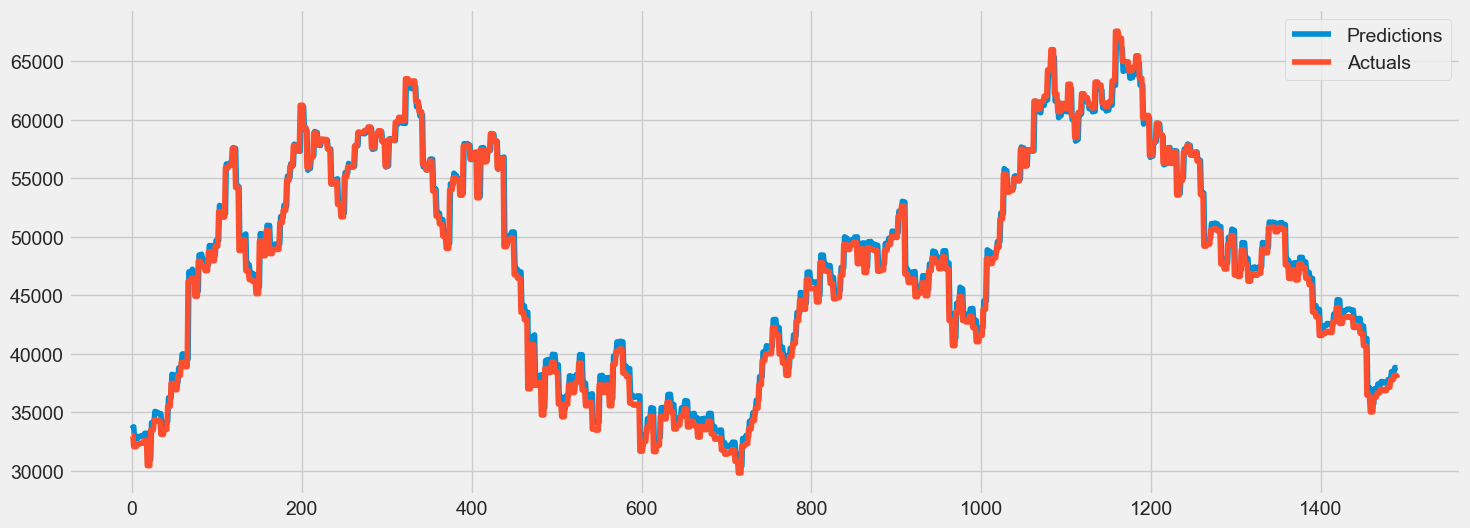

In [29]:
plt.figure(figsize=(16,6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

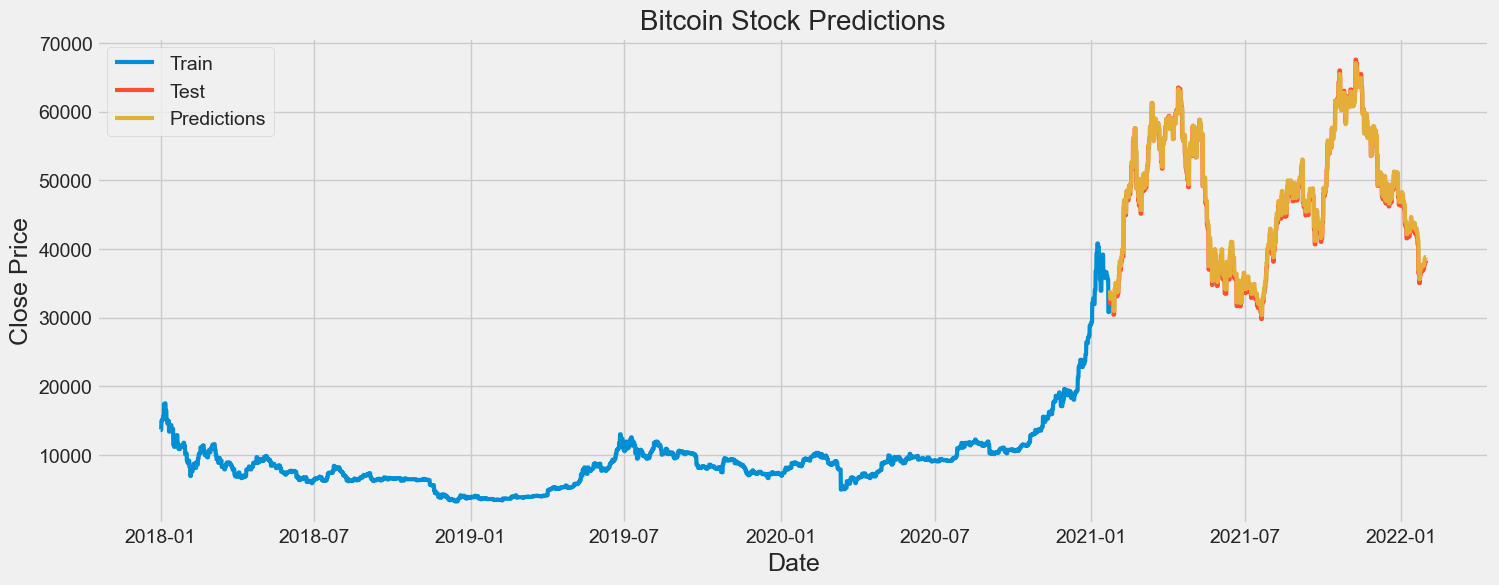

In [30]:
train = dataset.iloc[:train_size, 0:1]
test = dataset.iloc[train_size:, 0:1]
test['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Bitcoin Stock Predictions', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train[r'Close'], linewidth=3)
plt.plot(test[r'Close'], linewidth=3)


plt.plot(test['Predictions'], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])